# Discussion 8: Social Impacts of Palisades & Eaton Fires

In [28]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import contextily as ctx
from janitor import clean_names

In [3]:
# Load data
fp1 = os.path.join("data", "California_Historic_Fire_Perimeters_-5643920427189821347.geojson")
perimeter_data = gpd.read_file(fp1).clean_names()

fp2 = os.path.join("data", "EJI_2024_United_States", "EJI_2024_United_States.gdb")
eji_data = gpd.read_file(fp2).clean_names()

## 2. Polygon intersection

In [4]:
# Filter to 2025 Palisades
palisades_perimeter = perimeter_data[(perimeter_data['fire_name'] == "PALISADES") & (perimeter_data['year_'] == 2025)]

In [6]:
# Change EJI CRS
eji_data = eji_data.to_crs("EPSG:3857")

In [19]:
palisades_census = gpd.sjoin(left_df=eji_data, right_df=palisades_perimeter, how='inner')

<Axes: >

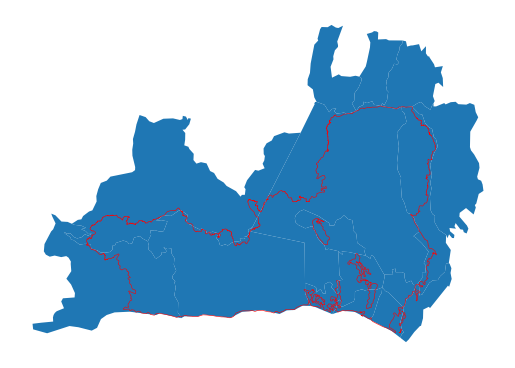

In [23]:
fig, ax = plt.subplots()

ax.axis('off')

palisades_census.plot(ax=ax)
palisades_perimeter.boundary.plot(ax=ax, edgecolor='red', linewidth=0.4)

<Axes: >

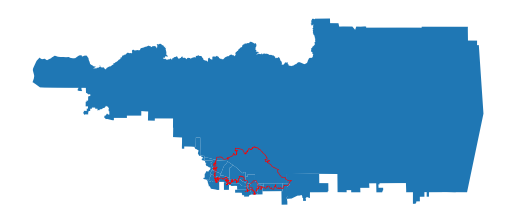

In [25]:
# Filter to 2025 Eaton
eaton_perimeter = perimeter_data[(perimeter_data['fire_name'] == "EATON") & (perimeter_data['year_'] == 2025)]

# Spatial join
eaton_census = gpd.sjoin(left_df=eji_data, right_df=eaton_perimeter, how='inner')

fig, ax = plt.subplots()

ax.axis('off')

eaton_census.plot(ax=ax)
eaton_perimeter.boundary.plot(ax=ax, edgecolor='red', linewidth=0.4)

## 3. Polygon clipping

<Axes: >

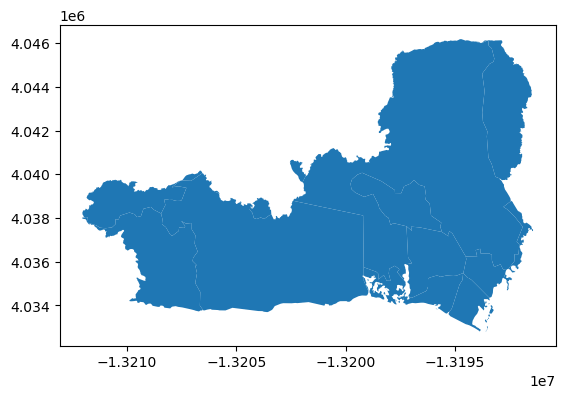

In [26]:
palisades_clip = gpd.clip(gdf=palisades_census, mask=palisades_perimeter)
palisades_clip.plot()

<Axes: >

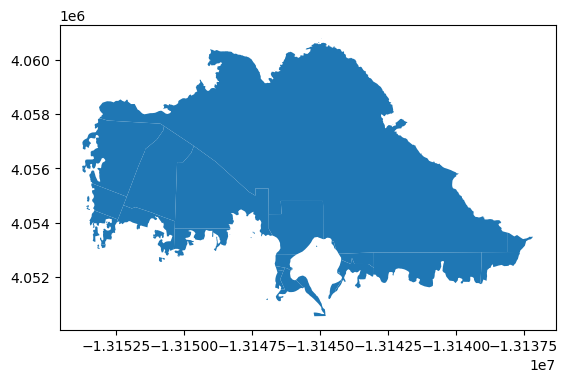

In [27]:
eaton_clip = gpd.clip(gdf=eaton_census, mask=eaton_perimeter)
eaton_clip.plot()

## 4. Visualize with basemap

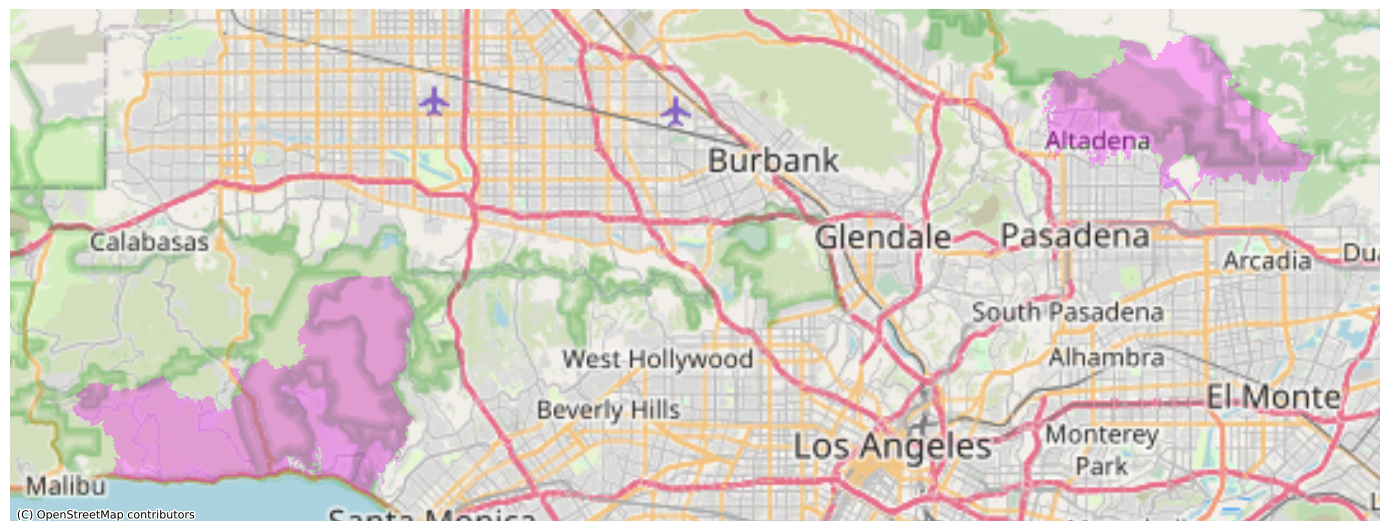

In [38]:
fig, ax = plt.subplots(1, 1, figsize=(14, 12))


# ADD FIRE PERIMETERS: UPDATE FILL TRANSPARENCY AND COLOR
palisades_clip.plot(ax=ax, facecolor='fuchsia', alpha=0.3)
eaton_clip.plot(ax=ax, facecolor='fuchsia', alpha=0.3)

# Add basemap using contextily
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

# ADD LEGEND OR ANNOTATION TO IDENTIFY EACH FIRE

# ADD TITLE

ax.axis('off')

plt.tight_layout()
plt.show()